In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [3]:
california_housing.frame.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
X=california_housing.data
y=california_housing.target

In [5]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


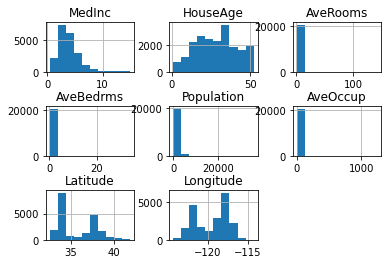

In [6]:
X.hist()
plt.subplots_adjust(hspace=0.7, wspace=0.4)


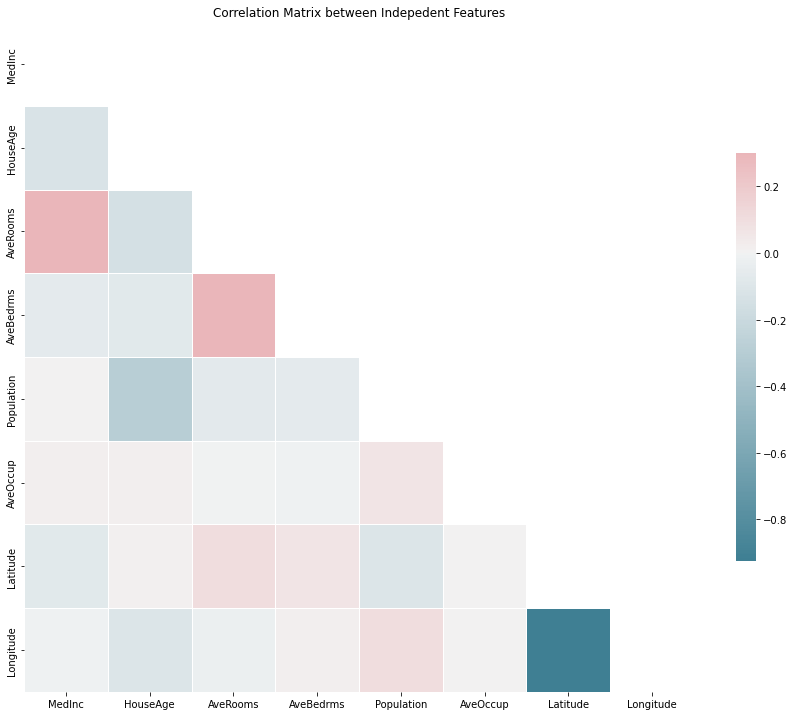

In [7]:
corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix between Indepedent Features")
plt.show()

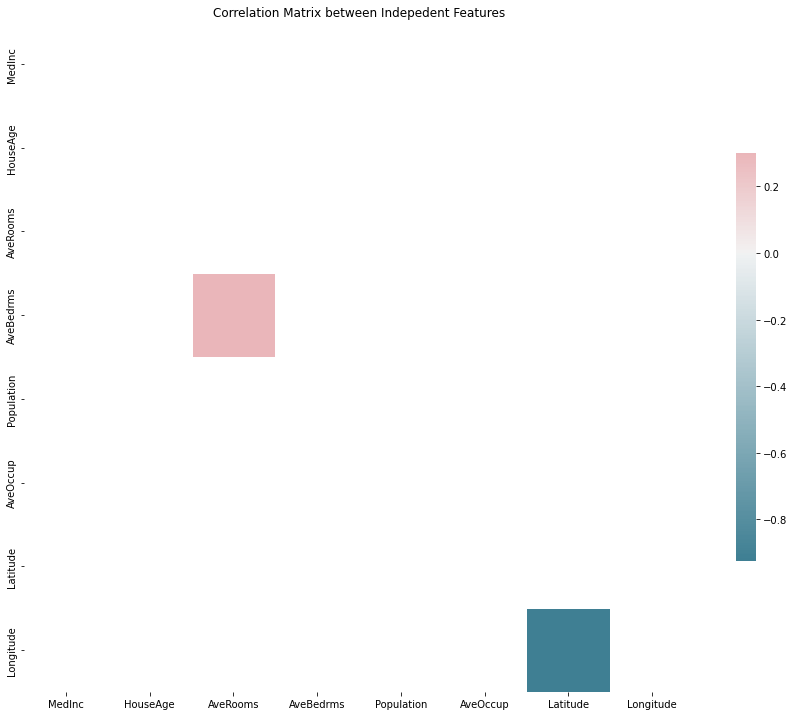

In [8]:
corr = X.corr()
corr=corr[((corr >= 0.8) | (corr <= -0.8)) & (corr !=1.000)]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix between Indepedent Features")
plt.show()

In [9]:
def corr_calc(variable):
    mean_var=X[variable].mean()
    mean_tar=y.mean()
    score=((X[variable]-mean_var)*(y-mean_tar))/(len(y)*X[variable].std()*y.std())
    return np.sum(score) 



In [10]:
corr_calc('AveBedrms')

-0.046698250347734255

In [11]:
corr_calc('AveRooms')

0.15194092790571312

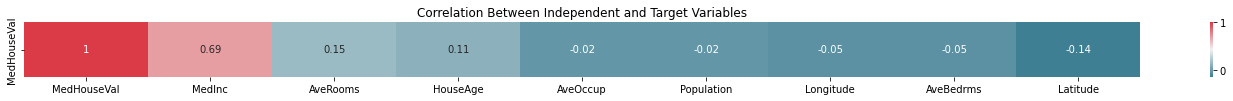

In [12]:
f, ax = plt.subplots(figsize=(25, 1))
corr = california_housing.frame.corr()

treatment = corr.sort_values(by=['MedHouseVal'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['MedHouseVal'],ascending=False).T
sns.heatmap(round(treatment,2), cmap=cmap, annot=True)
plt.title("Correlation Between Independent and Target Variables")
plt.show()

In [13]:
X.drop('Longitude',axis=1, inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_3804\1282272523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Longitude',axis=1, inplace=True)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

<AxesSubplot:>

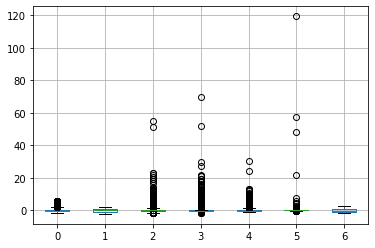

In [15]:
pd.DataFrame(scaler.transform(X)).boxplot()

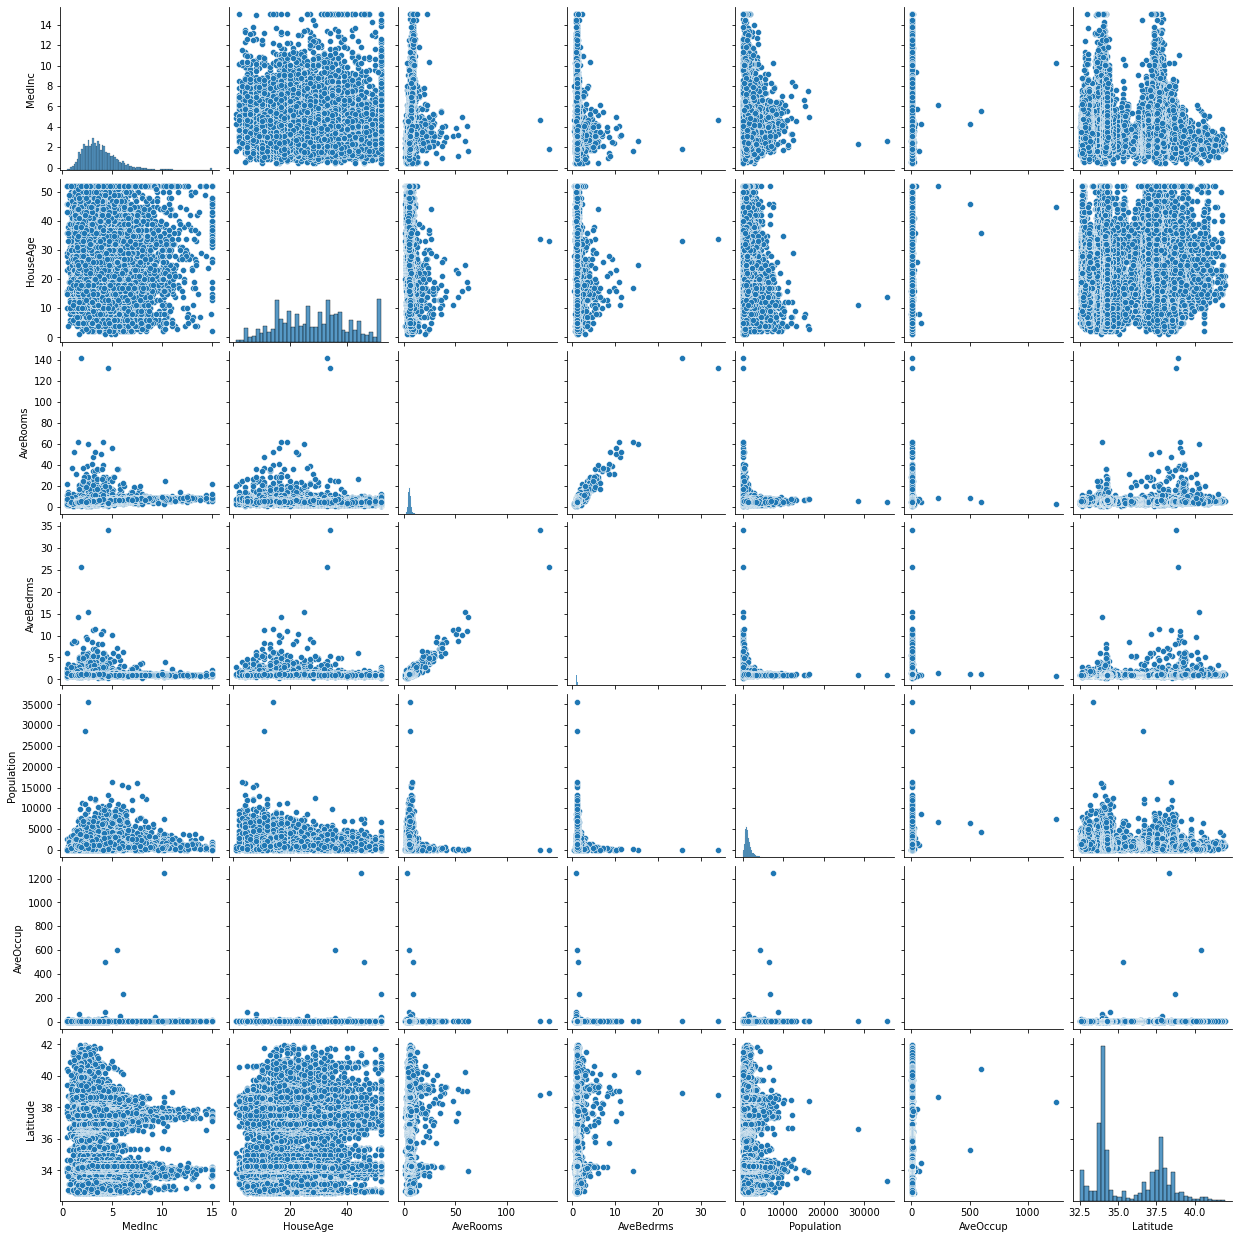

In [17]:
sns.pairplot(X)

In [22]:
X.drop('AveBedrms',axis=1, inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_3804\2614645098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('AveBedrms',axis=1, inplace=True)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lambdas = np.arange(0,1.01,0.01)

rmse_list = []

for l in lambdas:
    model = Lasso(alpha=l, max_iter=10000).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)  


C:\Users\mohit\AppData\Local\Temp\ipykernel_3804\3514756404.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=l, max_iter=10000).fit(x_train, y_train)
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+03, tolerance: 1.923e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

C:\Users\mohit\AppData\Local\Temp\ipykernel_3804\1289058481.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lambdas), rmse_list)


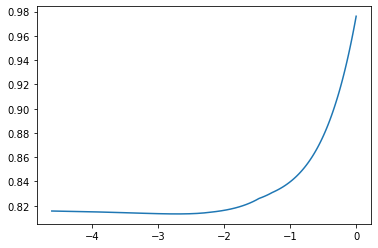

In [35]:
plt.plot(np.log(lambdas), rmse_list)

In [37]:
lambdas[np.argmin(rmse_list)]

0.07

In [38]:
model = Lasso(alpha=0.07, max_iter=10000).fit(x_train, y_train)
y_pred = model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

0.7945465875611292

In [40]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.8132725061592372

In [ ]:
hello